<H1><b>Pertemuan 2 - Back Propagation</b></H1>

<H3>Nama : Akmal Zuhdy Prasetya</H3>
<H3>NIM  : H071191035</H3>

<h2><b>Import Library</b></h2>

In [1]:
import tensorflow as tf
from d2l import tensorflow as d2l
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# **Functions**

### **1. ReLU**

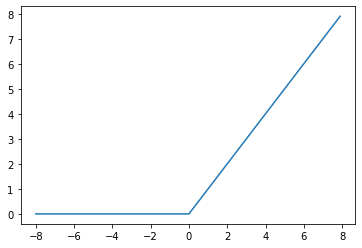

In [2]:
x = tf.Variable(tf.range(-8.0, 8.0, 0.1), dtype=tf.float32)
y = tf.nn.relu(x)
plt.plot(x.numpy(), y.numpy(), label='ReLU')

### **2. Sigmoid**

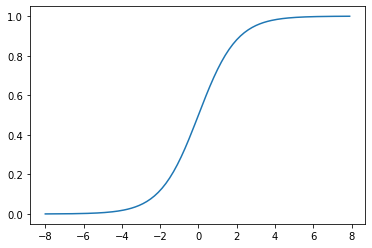

In [3]:
y = tf.nn.sigmoid(x)
plt.plot(x.numpy(), y.numpy())

### **3. Tanh**

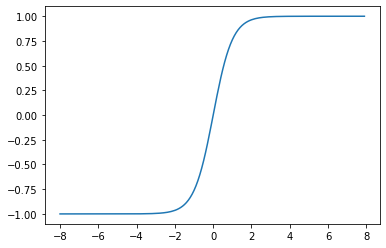

In [4]:
y = tf.nn.tanh(x)
plt.plot(x.numpy(), y.numpy())

### **4. GradientTape**

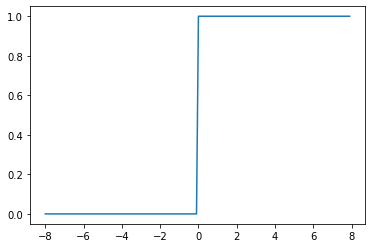

In [5]:
with tf.GradientTape() as t:
    y = tf.nn.relu(x)
    plt.plot(x.numpy(), t.gradient(y, x).numpy())

### **5. Multilayer Perceptron**

In [19]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [20]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = tf.Variable(tf.random.normal(
    shape=(num_inputs, num_hiddens), mean=0, stddev=0.01))
b1 = tf.Variable(tf.zeros(num_hiddens))
W2 = tf.Variable(tf.random.normal(
    shape=(num_hiddens, num_outputs), mean=0, stddev=0.01))
b2 = tf.Variable(tf.random.normal([num_outputs], stddev=.01))

params = [W1, b1, W2, b2]

In [8]:
def relu(X):
    return tf.math.maximum(X, 0)

In [9]:
def net(X):
    X = tf.reshape(X, (-1, num_inputs))
    H = relu(tf.matmul(X, W1) + b1)
    return tf.matmul(H, W2) + b2

In [10]:
def loss(y_hat, y):
    return tf.losses.sparse_categorical_crossentropy(
        y, y_hat, from_logits=True)

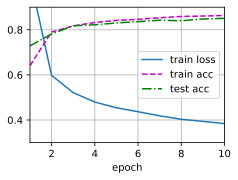

In [21]:
num_epochs, lr = 10, 0.1
updater = d2l.Updater([W1, W2, b1, b2], lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

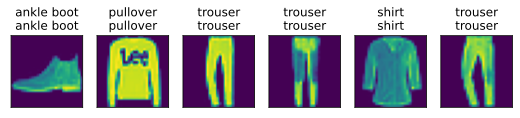

In [12]:
d2l.predict_ch3(net, test_iter)